# TEAM 17 NOTEBOOK 



# EDA, MERGING THE DATSET
===============

## 1. EDA of EPS, macroeconomic indicators

---------------

###  What is EPS?

**Earnings Per Share (EPS)** is a financial metric that shows how much profit a company makes for each share of its stock. It is a key indicator used by investors and analysts to assess a company’s profitability and financial performance.

There are typically two types of EPS values:

- **EPS Estimate** – the forecast made by analysts.
- **Reported EPS (Actual)** – the real value announced by the company.

The difference between the actual and estimated EPS, known as the **EPS Surprise**, can significantly impact a company's stock price. Positive surprises often lead to price jumps, while negative ones may cause declines.


## Why We Use Yahoo Finance

We use Yahoo Finance (`yfinance` library) as our data source because:

- It offers **free and easy access** to both stock price and earnings data.
- It is **reliable and widely used** in the financial and academic communities.
- It includes **historical market data**, essential for backtesting and modeling.



In [31]:
import yfinance as yf
import pandas as pd

In [32]:
# This function fetches recent daily stock price data (e.g., last 100 days) for a given ticker using Yahoo Finance.
def get_stock_data(ticker, start="2015-01-01", end="2025-01-01", interval="1d"):
    stock = yf.Ticker(ticker)
    df_price = stock.history(start=start, end=end, interval=interval)
    df_price.reset_index(inplace=True)
    df_price['Ticker'] = ticker
    return df_price


# Retrieves EPS Actual and Estimate values, along with the date of the earnings release
def get_eps_data(ticker, limit=100):
    stock = yf.Ticker(ticker)
    try:
        eps_df = stock.earnings_dates
    except Exception as e:
        print(f"Failed to get EPS data for {ticker}: {e}")
        return None

    if eps_df is None or eps_df.empty:
        print(f"EPS data not available for {ticker}.")
        return None

    eps_df = eps_df.reset_index()
    eps_df = eps_df.rename(columns={
        "Earnings Date": "Earnings_Date",
        "Reported EPS": "EPS_Actual",
        "EPS Estimate": "EPS_Estimate"
    })
    eps_df['Earnings_Date'] = pd.to_datetime(eps_df['Earnings_Date'])
    
    # Filter for EPS within 2015–2025
    eps_df = eps_df[
        (eps_df['Earnings_Date'] >= "2015-01-01") & 
        (eps_df['Earnings_Date'] <= "2025-12-31")
    ]
    return eps_df.head(limit)


# This function merges stock prices with EPS data using a nearest backward match based on dates
def merge_data(ticker):
    price_data = get_stock_data(ticker)
    eps_data = get_eps_data(ticker)

    if eps_data is None:
        price_data['EPS_Actual'] = None
        price_data['EPS_Estimate'] = None
        price_data['EPS_Surprise'] = None
        return price_data

    merged = pd.merge_asof(
        price_data.sort_values("Date"),
        eps_data.sort_values("Earnings_Date"),
        left_on="Date",
        right_on="Earnings_Date",
        direction="backward"
    )

    merged['EPS_Surprise'] = merged['EPS_Actual'] - merged['EPS_Estimate']
    return merged

In [33]:
# NASDAQ-100 Tickers
nasdaq_tickers = [
    'AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOGL', 'META', 'AVGO', 'COST', 'PEP', 'ADBE',
    'CSCO', 'TMUS', 'NFLX', 'TXN', 'QCOM', 'INTU', 'AMGN', 'AMD', 'INTC', 'HON',
    'ISRG', 'VRTX', 'AMAT', 'ADI', 'MU', 'SBUX', 'MDLZ', 'BKNG', 'LRCX', 'ADP',
    'REGN', 'GILD', 'ATVI', 'PANW', 'FTNT', 'FISV', 'CTSH', 'MNST', 'CSGP', 'KDP',
    'MAR', 'ROST', 'IDXX', 'CDNS', 'PAYX', 'CHTR', 'WBA', 'BIIB', 'ASML', 'TEAM',
    'ZM', 'DDOG', 'CRWD', 'ABNB', 'SNPS', 'DOCU', 'MRVL', 'NXPI', 'PDD', 'OKTA',
    'EXC', 'ORLY', 'AEP', 'MELI', 'VRSK', 'ILMN', 'SGEN', 'XEL', 'DLTR', 'FAST',
    'CPRT', 'LCID', 'BKR', 'CEG', 'JD', 'ZS', 'ALGN', 'ANSS', 'WDAY', 'TTD',
    'EBAY', 'SIRI', 'BIDU', 'MTCH', 'ENPH', 'LULU', 'VRSN'
]
# Collecting data for each ticker and concatenate into a single DataFrame
final_dataset = pd.DataFrame()
for ticker in nasdaq_tickers:
    print(f"Processing {ticker}...")
    try:
        df = merge_data(ticker)
        final_dataset = pd.concat([final_dataset, df], ignore_index=True)
    except Exception as e:
        print(f"Error processing {ticker}: {e}")

final_dataset['EPS_Surprise'] = final_dataset['EPS_Actual'] - final_dataset['EPS_Estimate']

# Saving new dataframe to CSV
final_dataset.to_csv("nasdaq_eps_merged.csv", index=False)

# Show sample
print(final_dataset[['Date', 'Ticker', 'Open', 'Close', 'EPS_Actual']].tail(10))

Processing AAPL...
Processing MSFT...
Processing AMZN...
Processing NVDA...
Processing GOOGL...
Processing META...
Processing AVGO...
Processing COST...
Processing PEP...
Processing ADBE...
Processing CSCO...
Processing TMUS...
Processing NFLX...
Processing TXN...
Processing QCOM...
Processing INTU...
Processing AMGN...
Processing AMD...
Processing INTC...
Processing HON...
Processing ISRG...
Processing VRTX...
Processing AMAT...
Processing ADI...
Processing MU...
Processing SBUX...
Processing MDLZ...
Processing BKNG...
Processing LRCX...
Processing ADP...
Processing REGN...
Processing GILD...
Processing ATVI...


$ATVI: possibly delisted; no timezone found


Error processing ATVI: Incompatible merge dtype, dtype('<M8[ns]') and dtype('O'), both sides must have numeric dtype
Processing PANW...
Processing FTNT...


$FISV: possibly delisted; no timezone found


Processing FISV...
Error processing FISV: Incompatible merge dtype, dtype('<M8[ns]') and dtype('O'), both sides must have numeric dtype
Processing CTSH...
Processing MNST...
Processing CSGP...
Processing KDP...
Processing MAR...
Processing ROST...
Processing IDXX...
Processing CDNS...
Processing PAYX...
Processing CHTR...
Processing WBA...
Processing BIIB...
Processing ASML...
Processing TEAM...
Processing ZM...
Processing DDOG...
Processing CRWD...
Processing ABNB...
Processing SNPS...
Processing DOCU...
Processing MRVL...
Processing NXPI...
Processing PDD...
Processing OKTA...
Processing EXC...
Processing ORLY...
Processing AEP...
Processing MELI...
Processing VRSK...
Processing ILMN...


$SGEN: possibly delisted; no timezone found


Processing SGEN...
Error processing SGEN: Incompatible merge dtype, dtype('<M8[ns]') and dtype('O'), both sides must have numeric dtype
Processing XEL...
Processing DLTR...
Processing FAST...
Processing CPRT...
Processing LCID...
Processing BKR...
Processing CEG...
Processing JD...
Processing ZS...
Processing ALGN...
Processing ANSS...
Processing WDAY...
Processing TTD...
Processing EBAY...
Processing SIRI...
Processing BIDU...
Processing MTCH...
Processing ENPH...
Processing LULU...
Processing VRSN...
                            Date Ticker        Open       Close  EPS_Actual
199466 2024-12-17 00:00:00-05:00   VRSN  193.981014  194.679123        2.07
199467 2024-12-18 00:00:00-05:00   VRSN  194.868595  190.919373        2.07
199468 2024-12-19 00:00:00-05:00   VRSN  190.600242  192.913940        2.07
199469 2024-12-20 00:00:00-05:00   VRSN  194.449737  198.299240        2.07
199470 2024-12-23 00:00:00-05:00   VRSN  199.456099  199.416214        2.07
199471 2024-12-24 00:00:00-05:00   V

###  EDA – Macroeconomic Indicators

In this section, I explore and clean the macroeconomic indicators dataset, which includes key economic variables over time. 

The dataset contains the following indicators:
- **GDP Growth**
- **Unemployment Rate**
- **Inflation (CPI)**
- **Interest Rate (Fed Funds)**
- **10-Year Treasury Yield**
- **Stock Market Volatility (VIX Index)**
- **30-Year Fixed Rate Mortgage Rate**
- **Median Sales Price of Houses**
- **Case-Shiller Home Price Index** (Seasonally & Not Seasonally Adjusted)
- **Retail Sales Data (Excluding Food Services)**
- **Consumer Price Index for All Urban Consumers**


In [34]:
import pandas as pd

# Loading the dataset 
file_path = "./MacroEconomicIndicators.csv"

df_macro = pd.read_csv(file_path)
# Basic Overview 
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype                           
---  ------         --------------  -----                           
 0   Date           2516 non-null   datetime64[ns, America/New_York]
 1   Open           2516 non-null   float64                         
 2   High           2516 non-null   float64                         
 3   Low            2516 non-null   float64                         
 4   Close          2516 non-null   float64                         
 5   Volume         2516 non-null   int64                           
 6   Dividends      2516 non-null   float64                         
 7   Stock Splits   2516 non-null   float64                         
 8   Ticker         2516 non-null   object                          
 9   Earnings_Date  360 non-null    datetime64[ns, America/New_York]
 10  EPS_Estimate   360 non-null    float64        

In [35]:
print("First Few Rows:")
df_macro.head()

First Few Rows:


,Date,GDP Growth,Unemployment Rate,Inflation (CPI),Interest Rate (Fed Funds),10-Year Treasury Yield,Stock Market Volatility (VIX Index),30-Year Fixed Rate Mortgage Rate,Median Sales Price of Houses,Case-Shiller Home Price Index (Seasonally Adjusted),Case-Shiller Home Price Index (Not Seasonally Adjusted),Retail Sales data (excluding food services),Consumer Price Index for All Urban Consumers
0,2015-01-01,18063.529,NaN,NaN,NaN,NaN,NaN,NaN,289200.0,NaN,NaN,NaN,NaN
1,2015-02-01,NaN,5.5,235.342,0.11,NaN,NaN,NaN,NaN,169.118,166.623,384779.0,235.342
2,2015-02-12,NaN,NaN,NaN,NaN,1.99,15.34,3.69,NaN,NaN,NaN,NaN,NaN
3,2015-02-13,NaN,NaN,NaN,NaN,2.02,14.69,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Checking for Missing Values 
print("Missing Values Per Column:")
print(df_macro.isnull().sum())

Missing Values Per Column:
Date                                                          0
GDP Growth                                                 2604
Unemployment Rate                                          2524
Inflation (CPI)                                            2524
Interest Rate (Fed Funds)                                  2524
10-Year Treasury Yield                                      142
Stock Market Volatility (VIX Index)                         107
30-Year Fixed Rate Mortgage Rate                           2122
Median Sales Price of Houses                               2604
Case-Shiller Home Price Index (Seasonally Adjusted)        2526
Case-Shiller Home Price Index (Not Seasonally Adjusted)    2526
Retail Sales data (excluding food services)                2525
Consumer Price Index for All Urban Consumers               2524
dtype: int64


In [37]:
# Converting Date to datetime 
df_macro['Date'] = pd.to_datetime(df_macro['Date'], errors='coerce')
df_macro = df_macro.sort_values(by='Date')

#  Handling Missing Values 
# Forward fill to propagate the last known value
df_macro = df_macro.fillna(method='ffill')

# Filling any remaining NaNs with backward fill
df_macro = df_macro.fillna(method='bfill')

df_macro.head()


C:\Users\zosia\AppData\Local\Temp\ipykernel_12852\3969072270.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_macro = df_macro.fillna(method='ffill')
C:\Users\zosia\AppData\Local\Temp\ipykernel_12852\3969072270.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_macro = df_macro.fillna(method='bfill')


,Date,GDP Growth,Unemployment Rate,Inflation (CPI),Interest Rate (Fed Funds),10-Year Treasury Yield,Stock Market Volatility (VIX Index),30-Year Fixed Rate Mortgage Rate,Median Sales Price of Houses,Case-Shiller Home Price Index (Seasonally Adjusted),Case-Shiller Home Price Index (Not Seasonally Adjusted),Retail Sales data (excluding food services),Consumer Price Index for All Urban Consumers
0,2015-01-01,18063.529,5.5,235.342,0.11,1.99,15.34,3.69,289200.0,169.118,166.623,384779.0,235.342
1,2015-02-01,18063.529,5.5,235.342,0.11,1.99,15.34,3.69,289200.0,169.118,166.623,384779.0,235.342
2,2015-02-12,18063.529,5.5,235.342,0.11,1.99,15.34,3.69,289200.0,169.118,166.623,384779.0,235.342
3,2015-02-13,18063.529,5.5,235.342,0.11,2.02,14.69,3.69,289200.0,169.118,166.623,384779.0,235.342
4,2015-02-16,18063.529,5.5,235.342,0.11,2.02,14.69,3.69,289200.0,169.118,166.623,384779.0,235.342


In [38]:
print("Missing Values After Cleaning:")
print(df_macro.isnull().sum())

Missing Values After Cleaning:
Date                                                       0
GDP Growth                                                 0
Unemployment Rate                                          0
Inflation (CPI)                                            0
Interest Rate (Fed Funds)                                  0
10-Year Treasury Yield                                     0
Stock Market Volatility (VIX Index)                        0
30-Year Fixed Rate Mortgage Rate                           0
Median Sales Price of Houses                               0
Case-Shiller Home Price Index (Seasonally Adjusted)        0
Case-Shiller Home Price Index (Not Seasonally Adjusted)    0
Retail Sales data (excluding food services)                0
Consumer Price Index for All Urban Consumers               0
dtype: int64


## Missing Values Summary


During the initial inspection of the macroeconomic dataset, missing values were detected across several columns. This was mainly due to differences in reporting frequency among economic indicators. 




To clean the dataset while preserving its chronological structure, the following steps were taken:

1. **Forward Fill (`ffill`)**: This method was applied to carry the last valid observation forward. It is appropriate for time-series data where the latest known value remains valid until updated.
2. **Backward Fill (`bfill`)**: Used to fill in any remaining missing values, especially those at the beginning of the dataset where no previous value exists.

This ensures there are no null values in the final dataset, maintaining consistency for downstream analysis and modeling.

All missing values were successfully filled, resulting in a complete dataset with no remaining null entries.


## Feature Engineering

In this section, I will generate additional features to enhance model performance, extract meaningful patterns from the data.

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [40]:
# Loading dataset (EPS)
df_eps = pd.read_csv("./nasdaq_eps_merged.csv", parse_dates=['Date', 'Earnings_Date'])

df_eps.sort_values(['Ticker', 'Date'], inplace=True)

# Daily Return
df_eps['Daily_Return'] = df_eps.groupby('Ticker')['Close'].pct_change()

# Moving Avarage 7 days
df_eps['MA_7'] = df_eps.groupby('Ticker')['Close'].rolling(window=7).mean().reset_index(level=0, drop=True)
# Moving Avarage 30 days
df_eps['MA_30'] = df_eps.groupby('Ticker')['Close'].rolling(window=30).mean().reset_index(level=0, drop=True)

# Volatility (7-day STD of returns)
df_eps['Volatility_7'] = df_eps.groupby('Ticker')['Daily_Return'].rolling(window=7).std().reset_index(level=0, drop=True)

df_eps.rename(columns={
    'EPS_Surprise': 'EPS_Surprise_Recalc',
    'Surprise(%)': 'EPS_Surprise_%'
}, inplace=True)

# Normalizing numeric columns
scaler = StandardScaler()
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'MA_7', 'MA_30', 'Volatility_7']
df_eps[numeric_cols] = df_eps[numeric_cols].fillna(0)  
df_eps[numeric_cols] = scaler.fit_transform(df_eps[numeric_cols])

# Saving engineered dataset
df_eps.to_csv("nasdaq_eps_engineered.csv", index=False)

df_eps[['Date', 'Ticker', 'Close', 'Daily_Return', 'MA_7', 'Volatility_7', 'EPS_Surprise_%']].tail(10)


,Date,Ticker,Close,Daily_Return,MA_7,Volatility_7,EPS_Surprise_%
172223,2024-12-17 00:00:00-05:00,ZS,0.111284,-0.838264,0.123979,0.582896,21.65
172224,2024-12-18 00:00:00-05:00,ZS,0.060889,-3.084493,0.113982,1.227801,21.65
172225,2024-12-19 00:00:00-05:00,ZS,0.052421,-0.589170,0.105090,1.213885,21.65
172226,2024-12-20 00:00:00-05:00,ZS,0.066659,0.905916,0.095043,1.087436,21.65
172227,2024-12-23 00:00:00-05:00,ZS,0.061743,-0.354426,0.085056,1.087042,21.65
172228,2024-12-24 00:00:00-05:00,ZS,0.066249,0.257577,0.079538,1.021782,21.65
172229,2024-12-26 00:00:00-05:00,ZS,0.067513,0.045499,0.071331,0.772054,21.65
172230,2024-12-27 00:00:00-05:00,ZS,0.057031,-0.713626,0.063559,0.764881,21.65
172231,2024-12-30 00:00:00-05:00,ZS,0.052148,-0.357041,0.062307,-0.404927,21.65
172232,2024-12-31 00:00:00-05:00,ZS,0.042861,-0.651152,0.060938,-0.389745,21.65


### Merging Stock + EPS Data with Macroeconomic Data

In [41]:
#Sorting by date
df_eps['Date'] = pd.to_datetime(df_eps['Date'], utc=True).dt.tz_convert(None)
df_macro['Date'] = pd.to_datetime(df_macro['Date'])

df_eps.sort_values('Date', inplace=True)
df_macro.sort_values('Date', inplace=True)

# Merging on nearest previous macroeconomic date
df_combined = pd.merge_asof(
    df_eps,
    df_macro,
    on='Date',
    direction='backward' 
)

# Check for remaining missing values
print("Remaining missing values after asof merge:\n", df_combined.isnull().sum())

Remaining missing values after asof merge:
 Date                                                            0
Open                                                            0
High                                                            0
Low                                                             0
Close                                                           0
Volume                                                          0
Dividends                                                       0
Stock Splits                                                    0
Ticker                                                          0
Earnings_Date                                              169515
EPS_Estimate                                               169515
EPS_Actual                                                 169560
EPS_Surprise_%                                             169560
EPS_Surprise_Recalc                                        169560
Daily_Return                    

### Normalizing Numerical Features

In [42]:
from sklearn.preprocessing import StandardScaler

# Exclude non-numeric columns explicitly
exclude_cols = ['Date', 'Ticker']
numeric_cols = df_combined.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
df_combined_scaled = df_combined.copy()
df_combined_scaled[numeric_cols] = scaler.fit_transform(df_combined[numeric_cols])

df_combined_scaled.tail()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Earnings_Date,...,Inflation (CPI),Interest Rate (Fed Funds),10-Year Treasury Yield,Stock Market Volatility (VIX Index),30-Year Fixed Rate Mortgage Rate,Median Sales Price of Houses,Case-Shiller Home Price Index (Seasonally Adjusted),Case-Shiller Home Price Index (Not Seasonally Adjusted),Retail Sales data (excluding food services),Consumer Price Index for All Urban Consumers
199471,2024-12-31 05:00:00,-0.541417,-0.541692,-0.540534,-0.541258,-0.044449,-0.017392,-0.00875,WBA,2024-10-15 07:00:00-04:00,...,1.866321,1.393085,1.937287,-0.138483,1.666158,1.166056,1.634243,1.589912,1.645855,1.866321
199472,2024-12-31 05:00:00,0.369418,0.362381,0.371705,0.365827,-0.238176,-0.017392,-0.00875,VRSK,2024-10-30 07:18:00-04:00,...,1.866321,1.393085,1.937287,-0.138483,1.666158,1.166056,1.634243,1.589912,1.645855,1.866321
199473,2024-12-31 05:00:00,0.154457,0.147246,0.153856,0.149147,-0.221558,-0.017392,-0.00875,ADI,2024-11-26 07:02:00-05:00,...,1.866321,1.393085,1.937287,-0.138483,1.666158,1.166056,1.634243,1.589912,1.645855,1.866321
199474,2024-12-31 05:00:00,-0.362297,-0.364021,-0.360401,-0.363391,-0.213152,-0.017392,-0.00875,EBAY,2024-10-30 16:08:00-04:00,...,1.866321,1.393085,1.937287,-0.138483,1.666158,1.166056,1.634243,1.589912,1.645855,1.866321
199475,2024-12-31 05:00:00,0.055567,0.047943,0.048688,0.042861,-0.232628,-0.017392,-0.00875,ZS,2024-12-02 16:09:00-05:00,...,1.866321,1.393085,1.937287,-0.138483,1.666158,1.166056,1.634243,1.589912,1.645855,1.866321


### Feature Selection 

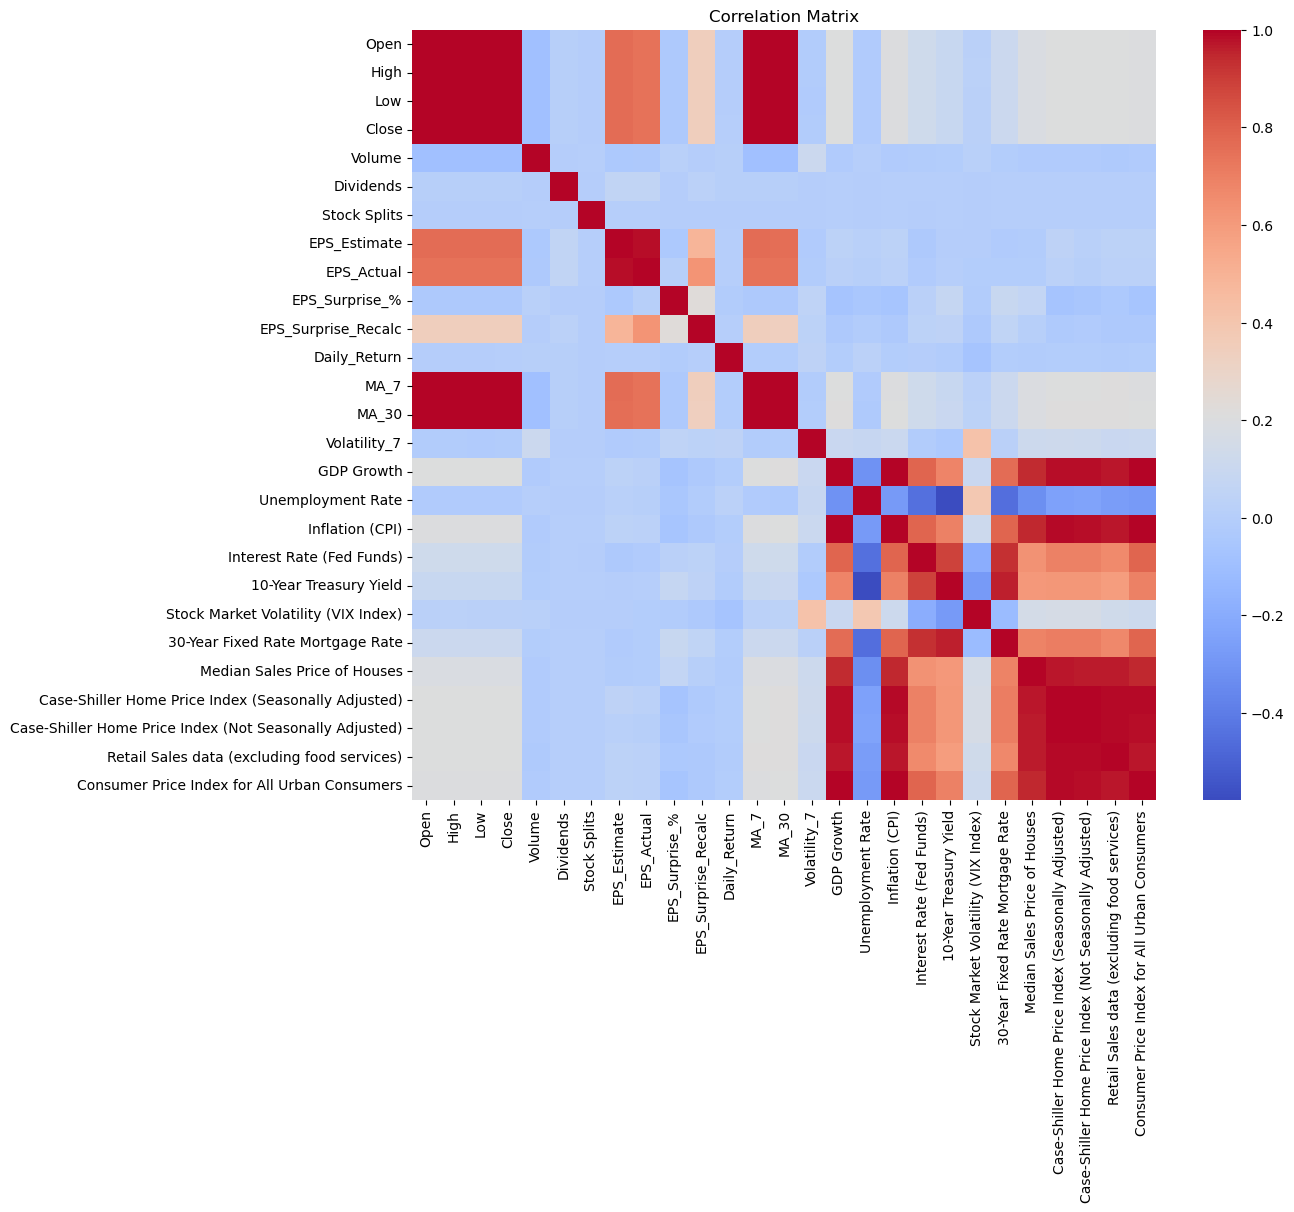

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Recomputing numeric columns for correlation matrix
numeric_cols_corr = df_combined_scaled.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 10))
corr_matrix = df_combined_scaled[numeric_cols_corr].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
